Scenario:

A fast-food chain plans to add a new item to its menu. However, they are still undecided between three possible marketing campaigns for promoting the new product. In order to determine which promotion has the greatest effect on sales, the new item is introduced at locations in several randomly selected markets. A different promotion is used at each location, and the weekly sales of the new item are recorded for the first four weeks.

Goal:

Evaluate A/B testing results and decide which marketing strategy works the best.

Data Description:

* MarketID: unique identifier for market
* MarketSize: size of market area by sales
* LocationID: unique identifier for store location
* AgeOfStore: age of store in years
* Promotion: one of three promotions that were tested
* week: one of four weeks when the promotions were run
* SalesInThousands: sales amount for a specific LocationID, Promotion, and week

In [1]:
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

import warnings

# import custom module
import sys
sys.path.append('../Modules')
import statistical_tests as st

warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("../Data/WA_Marketing-Campaign.csv")
display(df.head())
display(df.info())
display(df.describe())
print(df.shape) 

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


None

,MarketID,LocationID,AgeOfStore,Promotion,week,SalesInThousands
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,5.715328,479.656934,8.503650,2.029197,2.500000,53.466204
std,2.877001,287.973679,6.638345,0.810729,1.119055,16.755216
min,1.000000,1.000000,1.000000,1.000000,1.000000,17.340000
25%,3.000000,216.000000,4.000000,1.000000,1.750000,42.545000
50%,6.000000,504.000000,7.000000,2.000000,2.500000,50.200000
75%,8.000000,708.000000,12.000000,3.000000,3.250000,60.477500
max,10.000000,920.000000,28.000000,3.000000,4.000000,99.650000


(548, 7)


Investigate data distribution of market categories

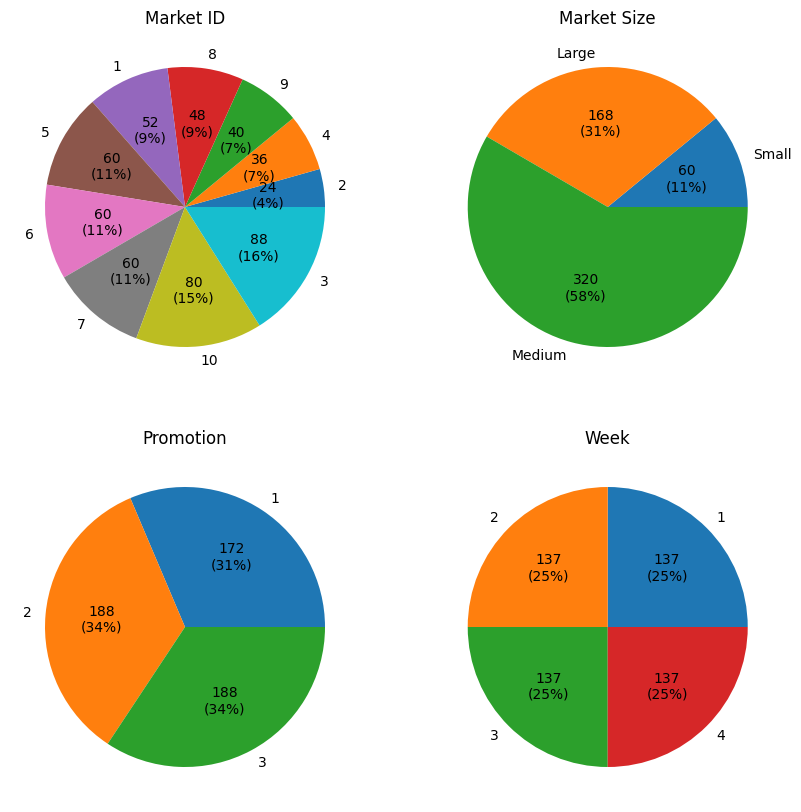

In [3]:
fig, ((ax11, ax12), (ax21, ax22)) = plt.subplots(ncols=2, nrows=2, figsize=(10, 10))

def label_function(val):
    return f'{val / 100 * len(df):.0f}\n({val:.0f}%)'

df.groupby('MarketID').size().sort_values().plot(kind='pie', autopct=label_function, ax=ax11, title="Market ID")
df.groupby('MarketSize').size().sort_values().plot(kind='pie', autopct=label_function, ax=ax12, title="Market Size")
df.groupby('Promotion').size().sort_values().plot(kind='pie', autopct=label_function, ax=ax21, title="Promotion")
df.groupby('week').size().sort_values().plot(kind='pie', autopct=label_function, ax=ax22, title="Week")

plt.show()

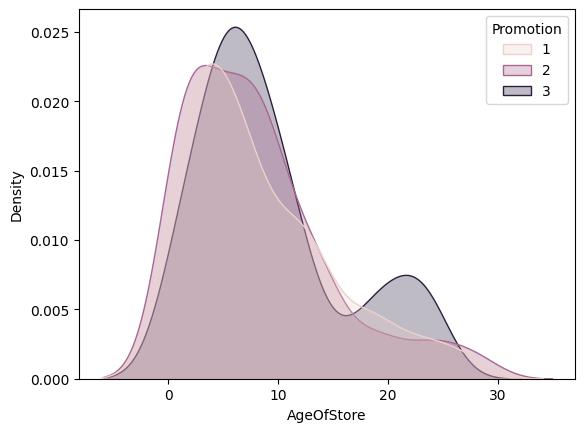

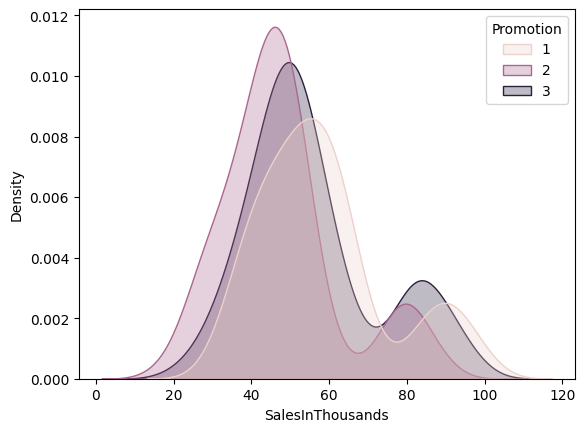

In [4]:
sns.kdeplot(data=df, x="AgeOfStore", hue="Promotion", fill=True, alpha=0.3)
plt.show()

sns.kdeplot(data=df, x="SalesInThousands", hue="Promotion", fill=True, alpha=0.3)
plt.show()

In [5]:
df["MarketSize"] = df["MarketSize"].astype("category")
df.dtypes 

MarketID               int64
MarketSize          category
LocationID             int64
AgeOfStore             int64
Promotion              int64
week                   int64
SalesInThousands     float64
dtype: object

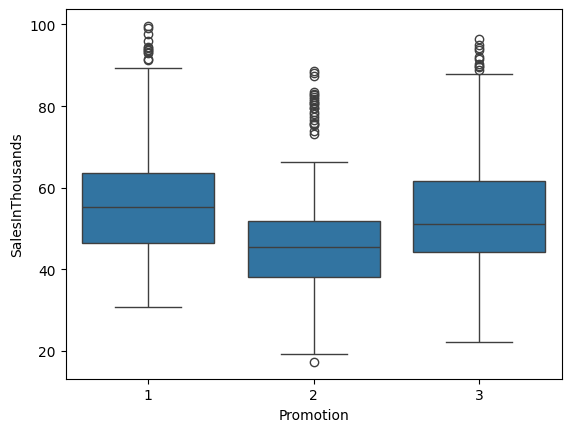

           count       mean        std    min      25%     50%      75%    max
Promotion                                                                     
1          172.0  58.099012  16.553782  30.81  46.3525  55.385  63.6175  99.65
2          188.0  47.329415  15.108955  17.34  38.1700  45.385  51.7450  88.64
3          188.0  55.364468  16.766231  22.18  44.1975  51.165  61.7325  96.48


In [6]:
sns.boxplot(data=df, x="Promotion", y="SalesInThousands")
plt.show()

promotion_desc_stats = df.groupby('Promotion')['SalesInThousands'].describe()
print(promotion_desc_stats)

In [7]:
df_summary, df_tukey = st.Multivariate_Test(df, group="Promotion", target="SalesInThousands")
display(df_summary)
display(df_tukey)

Kruskal-Wallis Test Statistic: 53.29475169322799
P-value: 2.6741866266697816e-12

Multi-Group Test Hypothesis
H0: All groups are equal
H1: At least one group is different


,Test Type,Hypothesis,p-value,Comment
0,Non-Parametric,Reject H0,2.674187e-12,At least one group differs


,group1,group2,meandiff,p-adj,lower,upper,reject
0,1,2,-10.7696,0.0000,-14.7738,-6.7654,True
1,1,3,-2.7345,0.2444,-6.7388,1.2697,False
2,2,3,8.0351,0.0000,4.1208,11.9493,True


* Promotion 1 performs much worse than Promotion 2. 
* Promotion 1 and Promotion 3 don't have a significant difference.
* Promotion 2 performs much better than Promotion 3.

Therefore, Promotion 2 is most effective, followed by Promotion 3, then Promotion 1.